camera work
record end
13-11-2021:02:51:48,261 INFO     [classes.py:197] Saving every 2.0 frames
13-11-2021:02:51:48,263 INFO     [classes.py:199] 20.00 fps, 129 frames, 6.45 seconds
13-11-2021:02:51:48,263 INFO     [classes.py:207] Making directories at output
13-11-2021:02:51:48,263 INFO     [classes.py:352] Deleted pre-existing output\SaveVideo_output.mp4


 50%|██████████████████████████████████████▊                                      | 65/129 [01:00<00:59,  1.07frames/s]


13-11-2021:02:52:49,106 INFO     [classes.py:320] Completed analysis: saved to output\SaveVideo_output.mp4
13-11-2021:02:52:49,106 INFO     [classes.py:327] Starting to Zip
13-11-2021:02:52:49,347 INFO     [classes.py:339] Zip has finished
   Emotions  Emotion Value
0     Angry           6.53
1   Disgust           0.00
2      Fear           6.11
3     Happy           0.65
4       Sad          10.18
5  Surprise           0.84
6   Neutral          21.64
분석된 당신의 면접 점수는  48 점 입니다.


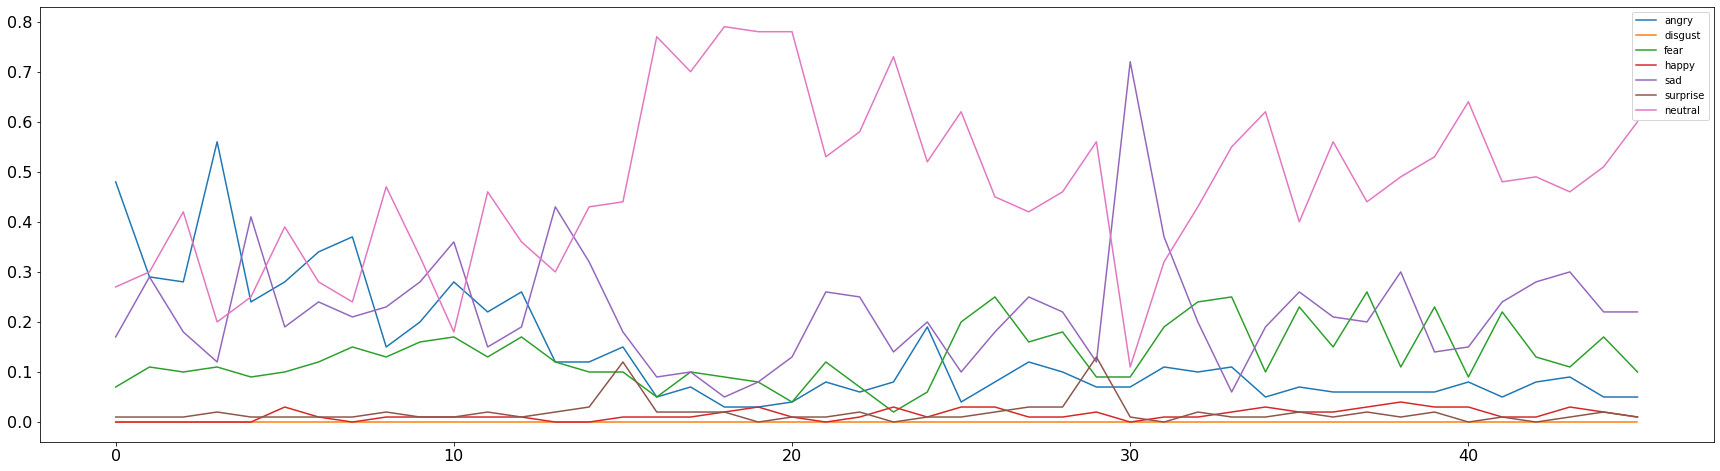

In [1]:
import cv2
import io
import cv2
import numpy as np
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
from tkinter import *
import tkinter as tk


def showVideo(): # 비디오를 보여주는 함수 생성

    #try except 예외처리 구문
    try:
        print("success.")
        #cv2.VideoCapture() 괄호안의 숫자는
        #웹캠의 순서를 의미함.
        #컴퓨터에 있는 웹캠의 순서대로 0부터 1 씩늘어남.
        #노트북에 있는 캠을 사용한다고하면 0, 외에 다른 웹캠을 사용한다면 1,2,3,4 등등
        cap = cv2.VideoCapture(0)

        #실시간으로 비디오를 캡쳐하는 것이 아닌 저장되어있는 비디오파일을 실행시키는
        #경우에는 cv2.VideoCapture(경로) 를 입력할 것
    except:
        print("fail")
        return

    #VideoCapture.set(속성,값) 을통해서 캡쳐된 화면에 대한 속성 변경가능
    # 속성 3번은 width(폭) , 4번은 heigh(높이)
    # 출력될 비디오화면의 폭 높이 480x320
    cap.set(3,480)
    cap.set(4,320)

    # 촬영되는 이미지프레임을 1ms 단위로 출력해주기 위한 반복
    while True:
        # 비디오 캡쳐를 읽습니다. .read() 의 동작은 한 화면씩 캡쳐한다는 뜻입니다.
        # 한프레임씩 읽음
        # 비디오 프레임을 읽었다면 ret의 값이 True가 되고 실패하면 False가 됨.
        # 읽은 프레임은 frame 이라는 변수에 저장됩니다.
        # ret = 제대로 영상이 찍힌지 확인 , frame = 찍힌 영상이 저장.
        ret, frame = cap.read()

        # ret 이 false 일 경우 frame 읽기실패이므로 while문을 빠져나옵니다.
        if not ret:
            print("video reading error")
            break

        # 저장된 frame 을 보여줍니다.
        cv2.imshow('video',frame)

        # 키 입력값을 1ms 간격으로 읽어들입니다.
        # 이 부분은 1ms 간격으로 frame을 촬영하여 ESC의 키값인 27이 들어오지
        # 않으면 반복적으로 frame 을 촬영하여 보여준다는 의미입니다.
        # ESC의 키값인 27을 읽으면 while문을 빠져나와 촬영을 중단합니다.
        k = cv2.waitKey(1)
        if k == 27:
            break

    # 비디오 파일 또는 캡쳐 장치를 닫는 명령어 release()
    cap.release()

    # 연결된 창 끄기
    cv2.destroyAllWindows()




def VideoWrite():

    window.quit()
    window.destroy()
    
    
    try:
        print("camera work")
        cap = cv2.VideoCapture(0)
    except:
        print("camera work fail")
        return

    # 폭, 높이 값을 카메라속성에 맞춤
    # cap.set(probID, 속성값) 은 출력될 값들을 지정해주는 것이고
    # cap.get(probID) 는 해당 속성에 대한 값을 받아오는 것임.
    # 아래의 폭과 높이는 웹캠의 속성을 그대로 가져와 사용하는것.
    width = int(cap.get(3))
    height = int(cap.get(4))

    # 코덱정보를 나타냄 아래의 두줄과 같이 사용할 수 있음.
    # 둘중 어느것을 쓰든 상관없음.
    # 여러가지의 코덱종류가 있지만 윈도우라면 DIVX 를 사용
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    # fourcc = cv2.VideoWriter_fourcc('D','I','V','X')

    # 비디오 저장을 위한 객체를 생성해줌.
    out = cv2.VideoWriter('SaveVideo.mp4',fourcc,20.0,(width, height))

    while(True):
        ret, frame = cap.read()

        if not ret:
            print("video reading error")
            break

        # 비디오 프레임이 정확하게 촬영되었으면 화면에 출력하여줌
        cv2.imshow('video',frame)

        # 비디오 프레임이 제대로 출력되면 해당파일에 프레임을 저장
        out.write(frame)

        # ESC키값을 입력받으면 녹화종료 메세지와 함께 녹화종료
        k= cv2.waitKey(1)
        if(k == 27):
            print('record end')
            break

    # 비디와 관련 장치들을 다 닫아줌.
    cap.release()
    out.release()
    cv2.destroyAllWindows()


    
window = Tk() 
window.title("우리팀원중에버스기사있나요?") 

image = PhotoImage(file="a.png",master=window)
photo = PhotoImage(file="b.png",master=window)

label = Label(window, image=photo) 
label.grid(column=0, row=0)
    
# 버튼 파라미터로 텍스트/배경색/전경색/이벤트 설정 
button = Button(window, image=image, command=VideoWrite)
button.grid(column=0, row=1)



# get screen width and height
ws = window.winfo_screenwidth() # width of the screen
hs = window.winfo_screenheight() # height of the screen

# calculate x and y coordinates for the Tk root window
x = (ws/2) -190
y = (hs/2) -100

# set the dimensions of the screen 
# and where it is placed
window.geometry('%dx%d+%d+%d' % (340, 290, x, y))


window.mainloop()

location_videofile = "c:/Users/5744p/SaveVideo.mp4" #분석할데이터위치,이름

# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False,save_fps=10)

# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Emotions'])
score_comparisons['Emotion Value'] = emotions_values


pltfig = vid_df.plot(figsize=(30, 8), fontsize=16).get_figure()
pltfig.savefig('./output/result_graph.png')

print(score_comparisons)

print("분석된 당신의 면접 점수는 ",str(int((score_comparisons['Emotion Value'][3]+score_comparisons['Emotion Value'][6])/sum(score_comparisons['Emotion Value'])*100)),"점 입니다.")
lines=["분석된 당신의 면접 점수는 ",str(int((score_comparisons['Emotion Value'][3]+score_comparisons['Emotion Value'][6])/sum(score_comparisons['Emotion Value'])*100)),"점 입니다."]



score_comparisons.to_csv('./output/output.txt', sep = '\t', index = False)
with open('./output/output.txt', 'a') as f:
    f.writelines(lines)
    f.writelines('\n')
